### 1. Importing important libs

In [2]:
# Regular libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import os

# Tensorflow 
from tensorflow import keras


# Datasets
train_dir = '/mnt/e/DeepLearningDatasets/BrainTumorDetection/brain_tumor_dataset'

2023-05-06 21:30:44.233741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 21:30:45.846636: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-06 21:30:48.925790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/server/miniconda3/envs/tf/lib/:/home/server/miniconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib:/home/server/miniconda3/envs/tf/lib/:/home/server/miniconda3/envs/tf/lib/python3.9/site-packages/

### 2. Data distribution visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


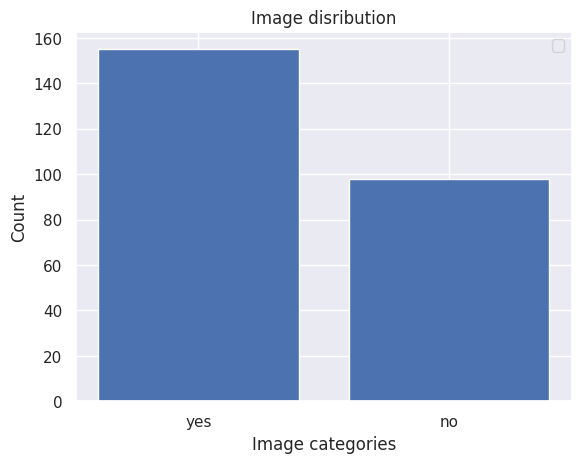

In [2]:
plt.bar(['yes','no'], [len(os.listdir(os.path.join(train_dir,'yes'))), len(os.listdir(os.path.join(train_dir,'no')))])
plt.legend()
plt.ylabel('Count')
plt.xlabel('Image categories')
plt.title('Image disribution')
plt.show()

### 3. Building data generators

In [3]:
# Data augmentations
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.3,
    brightness_range = [0.4, 1.5],
    validation_split= 0.2,
)

In [4]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training',
    color_mode='rgb',
    shuffle = True
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation',
    color_mode='rgb',
    shuffle = True
)



Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


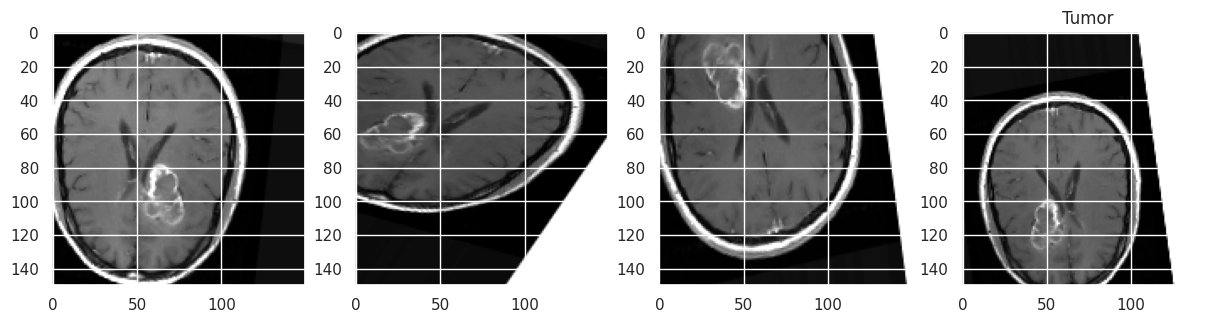

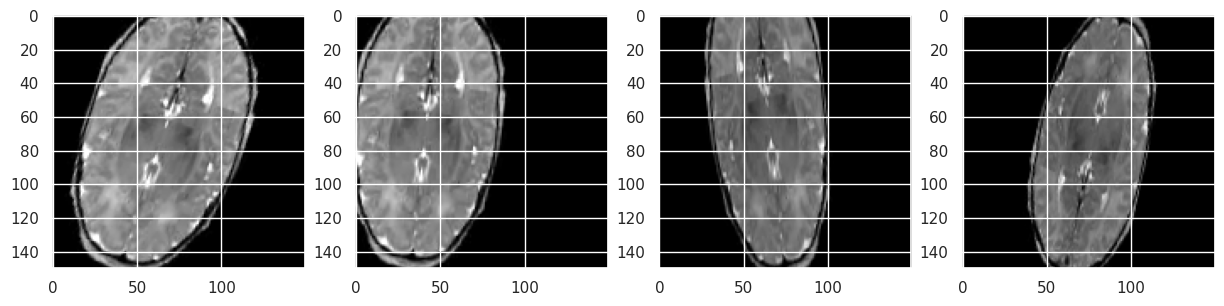

In [5]:
# Visualizing the data augmentations

# Turmor images
from keras.utils import load_img, img_to_array, array_to_img
from keras.preprocessing import image
fnames = [os.path.join(train_dir+'/yes', fname) for fname in os.listdir(train_dir+'/yes')]
img_path=fnames[3]
img = load_img(img_path, target_size = (150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 1
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(1,4,i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break
plt.title("Tumor")
plt.show()

# Non tumor
fnames = [os.path.join(train_dir+'/no', fname) for fname in os.listdir(train_dir+'/no')]
img_path=fnames[3]
img = load_img(img_path, target_size = (150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 1
fig, axs = plt.subplots(1, 4, figsize=(15, 15))
for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(1,4,i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break
plt.show()

### 4. Building the model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [7]:
model = Sequential()
# Con2D Layers
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation = 'relu'))

# Dense Layers
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2))


2023-05-06 16:55:05.360772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 16:55:05.406379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 16:55:05.406853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 16:55:05.408525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

### 5. Compile and training the model

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    train_generator, 
    epochs = 50,
    validation_data = validation_generator, 
)

Epoch 1/50
7/7 [==============================] - 6s 863ms/step - loss: 5.9344 - accuracy: 0.6108 - val_loss: 5.7947 - val_accuracy: 0.6200
Epoch 2/50
7/7 [==============================] - 6s 915ms/step - loss: 5.9344 - accuracy: 0.6158 - val_loss: 5.7947 - val_accuracy: 0.6400
Epoch 3/50
7/7 [==============================] - 7s 970ms/step - loss: 5.9344 - accuracy: 0.5813 - val_loss: 5.7947 - val_accuracy: 0.6000
Epoch 4/50
7/7 [==============================] - 7s 915ms/step - loss: 5.9344 - accuracy: 0.6305 - val_loss: 5.7947 - val_accuracy: 0.6800
Epoch 5/50
7/7 [==============================] - 6s 898ms/step - loss: 5.9344 - accuracy: 0.5764 - val_loss: 5.7947 - val_accuracy: 0.7400
Epoch 6/50
7/7 [==============================] - 6s 860ms/step - loss: 5.9344 - accuracy: 0.6453 - val_loss: 5.7947 - val_accuracy: 0.6200
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 5.9344 - accuracy: 0.6108 - val_loss: 5.7947 - val_accuracy: 0.6400
Epoch 8/50
7/7 [=======

2/2 [==============================] - 1s 345ms/step - loss: 5.7947 - accuracy: 0.5800


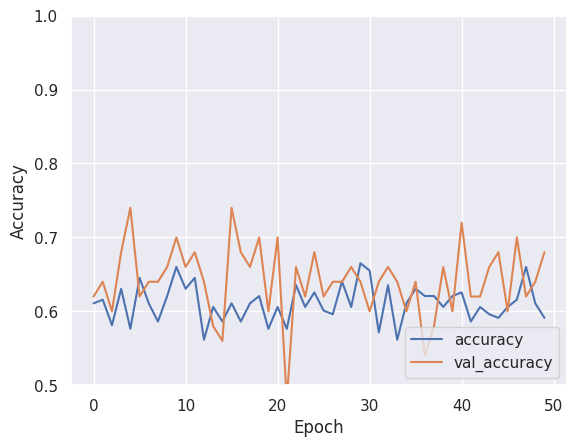

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator)

In [21]:
print(test_acc)

0.5799999833106995


#### Conclusion
<p>As we observer the accuracy of this is not very good since there is very limited data to train on.</p>

### 6. Using transfer learning

In [7]:
from keras.applications import MobileNetV2

In [8]:
feature_extractor = MobileNetV2(
    input_shape = (150, 150, 3),
    weights = 'imagenet',
    include_top = False,
    pooling = 'avg'
)
feature_extractor.trainable = False

2023-05-06 19:00:12.378525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 19:00:12.945216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 19:00:12.946299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 19:00:12.948794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

9406464/9406464 [==============================] - 1s 0us/step


In [9]:
inputs = feature_extractor.input
x = Dense(128, activation = 'relu')(feature_extractor.output)
x = Dense(128, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'] 
)

In [12]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50
)

Epoch 1/50
7/7 [==============================] - 8s 1s/step - loss: 0.3273 - accuracy: 0.8571 - val_loss: 0.2686 - val_accuracy: 0.9000
Epoch 2/50
7/7 [==============================] - 7s 988ms/step - loss: 0.3798 - accuracy: 0.8522 - val_loss: 0.2705 - val_accuracy: 0.8800
Epoch 3/50
7/7 [==============================] - 7s 990ms/step - loss: 0.2919 - accuracy: 0.8916 - val_loss: 0.2538 - val_accuracy: 0.9000
Epoch 4/50
7/7 [==============================] - 7s 987ms/step - loss: 0.3382 - accuracy: 0.8621 - val_loss: 0.1968 - val_accuracy: 0.9600
Epoch 5/50
7/7 [==============================] - 7s 1s/step - loss: 0.3128 - accuracy: 0.8719 - val_loss: 0.2998 - val_accuracy: 0.8800
Epoch 6/50
7/7 [==============================] - 7s 1s/step - loss: 0.2994 - accuracy: 0.8768 - val_loss: 0.1793 - val_accuracy: 0.9400
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 0.2654 - accuracy: 0.9015 - val_loss: 0.2207 - val_accuracy: 0.9200
Epoch 8/50
7/7 [================

In [13]:
model.save('trained_model.h5')

2/2 [==============================] - 1s 208ms/step - loss: 0.0968 - accuracy: 0.9800
0.9800000190734863


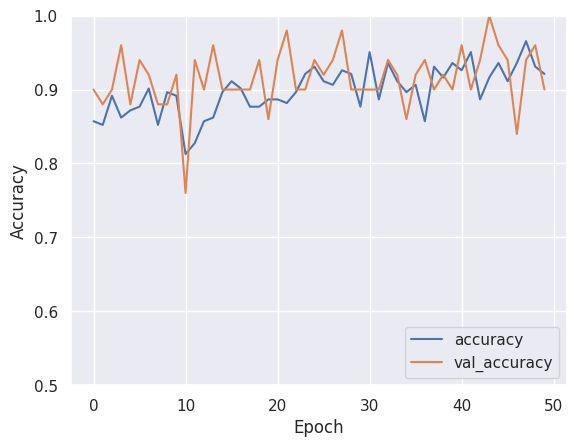

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator)
print(test_acc)

### Conclusion 
<p>As we can see the accuracy has improved significantly in comparison to the standard network</p>

### 7. Predictions on random data

In [3]:
from keras.utils import load_img, img_to_array, array_to_img
from keras.preprocessing import image

In [4]:
model = keras.models.load_model('trained_model.h5')

2023-05-06 21:31:19.435488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 21:31:20.049209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 21:31:20.050188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-06 21:31:20.052392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Text(0.5, 1.0, 'YES')

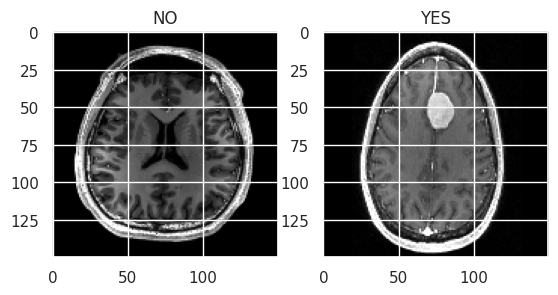

In [38]:
images_paths = ['prediction images/no_tumor.jpg', 'prediction images/tumor.jpg']
pred_labels = {1 : 'yes', 0 : 'no'}
fig, axes = plt.subplots(1, 2)
i = 1
for image_path in images_paths:
    img = load_img(image_path, target_size = (150,150))
    plt.subplot(1,2,i)
    i += 1
    plt.imshow(img)
axes[0].set_title('NO')
axes[1].set_title('YES')

In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [39]:
img = load_img(images_paths[0], target_size = (150,150))
img_array = img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [40]:
img_preprocessed = preprocess_input(img_batch)

In [41]:
prediction = model.predict(img_preprocessed)

1/1 [==============================] - 0s 30ms/step


In [42]:
pred = np.argmax(prediction, axis = 1)
print(pred)

[0]


In [43]:
img = load_img(images_paths[1], target_size = (150,150))
img_array = img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)

1/1 [==============================] - 0s 42ms/step


In [44]:
pred = np.argmax(prediction, axis = 1)
print(pred)

[0]
